In [14]:
import csv
import matplotlib.pyplot as plt
from operator import itemgetter, attrgetter
import pandas as pd
import seaborn as sn
import math
import scipy.spatial as spatial
import scipy.stats as stats
import numpy as np
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import os

In [15]:
#Constants
INTERESTING_PATHS = [
    '../scripts/allModels/',
    '../scripts-clones/highBranchSmall_2/',
    '../scripts-clones/highBranchMidActions/',
    '../scripts-clones/randomRun/',
    '../scripts-clones/smallBranch/',
    '../scripts/MECrelated/',
    '../scripts-clones/testTopological_1/',
    '../scripts-clones/testTopological_2/',
    '../scripts-clones/randomRunBig/',
    '../scripts-clones/randomRunBig_2/',
    '../scripts-clones/moreTrees/',
]
PATH_TO_CSV_FOLDER = INTERESTING_PATHS[-1]
print("Chosen Path: "+PATH_TO_CSV_FOLDER)

Chosen Path: ../scripts-clones/moreTrees/


## Load Data

In [16]:
property_meta_keys = ["Model"]

property_keys = [
    "NumStates",
    "NumActions",
    "NumTargets",
    "NumSinks",
    "NumUnknown",
    "NumMaxActions",
    "NumMaxTransitions",
    "SmallestTransProb",
    "NumProbActions",
    "NumMECs",
    "BiggestMEC",
    "SmallestMEC",
    "AvgMEC",
    "MedianMEC",
    "NumSCCs",
    "BiggestSCC",
    "AvgSCC",
    "NearestTarget",
    "FurthestTarget"
]

analysis_keys = property_meta_keys + property_keys

unknown_threshold = 5
def is_property_defined(prop, keys, row):
    return (prop in keys and
            row[prop] != None and
            row[prop] != "" and
            row[prop] != ' ')

def should_remove_model(row_to_include, analysis_keys, filter_dict):
    if (not is_property_defined("NumStates", analysis_keys, row_to_include)):
        filter_dict["Timeout"] +=1
        return True
    elif (is_property_defined("NumUnknown", analysis_keys, row) and int(row_to_include["NumUnknown"]) <= unknown_threshold):
        filter_dict["Unknown<=%d" % unknown_threshold] +=1
        return True
    
    #Special Filtering Criteria for different test-suites
    SPECIAL_FILTERS = True
    if (SPECIAL_FILTERS):
        filter_conditions = [
            #int(row_to_include["NumStates"]) <= 7000,
            #int(row_to_include["NumStates"]) < 1000,
            #not "MinAct_10" in row_to_include["Model"],
            #"MinTransProb" in row_to_include["Model"],
            "Type-tree" in row_to_include["Model"]
        ]
        
        if (True in filter_conditions):
            return True
        
        
    return False

def normalization(row, analysis_keys):
    if (is_property_defined("NumStates", analysis_keys, row)):
        for value_to_normalize in [
            "NumTargets",
            "NumSinks",
            "NumUnknown",
        ]:
            if (value_to_normalize in analysis_keys):
                row[value_to_normalize] = float(row[value_to_normalize]) / float(row["NumStates"]) 

filter_dict = dict()
filter_dict["Unknown<=%d" % unknown_threshold] = 0 #Not an interesting model
filter_dict["Timeout"] = 0
filter_dict["SpecialFilters"] = 0
table_properties = []
total_rows = 0
with open(PATH_TO_CSV_FOLDER+'analysis.csv', newline='\n') as propertiesFile:
        reader = csv.DictReader(propertiesFile)
        for row in reader:
            total_rows += 1
            row_to_include = {k:row[k] for k in analysis_keys if k in row}
            
            for key in analysis_keys:
                if (row_to_include[key] == " ?"):
                    row_to_include[key] = 0

            #Filtering
            if (should_remove_model(row_to_include, analysis_keys, filter_dict)):
                continue

            #Normalizations
            normalization(row_to_include, analysis_keys)

            table_properties.append(row_to_include)

print("With filtering there are %d/%d models left to check from" % (len(table_properties), total_rows))
print("The rest was filtered because of following reasons: ")
print(filter_dict)

With filtering there are 2688/4444 models left to check from
The rest was filtered because of following reasons: 
{'Unknown<=5': 1756, 'Timeout': 0, 'SpecialFilters': 0}


In [17]:
print(*list(map(lambda x : (x["Model"]), table_properties)), sep= "\n")

RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_1
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_100
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_101
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_103
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_104
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_106
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_107
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_11
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_110
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_112
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_113
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_114
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_117
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_118
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_119
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_12
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_120
RANDOM_Size_10002_MinAct_10_MinTransProb_0.01_Model_

RANDOM_Size_1002_MinAct_10_Model_11
RANDOM_Size_1002_MinAct_10_Model_113
RANDOM_Size_1002_MinAct_10_Model_114
RANDOM_Size_1002_MinAct_10_Model_117
RANDOM_Size_1002_MinAct_10_Model_118
RANDOM_Size_1002_MinAct_10_Model_12
RANDOM_Size_1002_MinAct_10_Model_122
RANDOM_Size_1002_MinAct_10_Model_123
RANDOM_Size_1002_MinAct_10_Model_126
RANDOM_Size_1002_MinAct_10_Model_127
RANDOM_Size_1002_MinAct_10_Model_128
RANDOM_Size_1002_MinAct_10_Model_129
RANDOM_Size_1002_MinAct_10_Model_13
RANDOM_Size_1002_MinAct_10_Model_133
RANDOM_Size_1002_MinAct_10_Model_136
RANDOM_Size_1002_MinAct_10_Model_138
RANDOM_Size_1002_MinAct_10_Model_14
RANDOM_Size_1002_MinAct_10_Model_140
RANDOM_Size_1002_MinAct_10_Model_141
RANDOM_Size_1002_MinAct_10_Model_142
RANDOM_Size_1002_MinAct_10_Model_144
RANDOM_Size_1002_MinAct_10_Model_146
RANDOM_Size_1002_MinAct_10_Model_147
RANDOM_Size_1002_MinAct_10_Model_148
RANDOM_Size_1002_MinAct_10_Model_149
RANDOM_Size_1002_MinAct_10_Model_15
RANDOM_Size_1002_MinAct_10_Model_150
RANDOM

RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_61
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_64
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_65
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_66
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_67
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_69
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_70
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_71
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_73
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_74
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_75
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_76
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_78
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_79
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_81
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_82
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_85
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_9
RANDOM_Size_1002_MinAct_5_MinTransProb_0.1_Model_90
RANDOM_Size_1

RANDOM_Size_102_MinTransProb_0.01_Model_103
RANDOM_Size_102_MinTransProb_0.01_Model_104
RANDOM_Size_102_MinTransProb_0.01_Model_105
RANDOM_Size_102_MinTransProb_0.01_Model_107
RANDOM_Size_102_MinTransProb_0.01_Model_108
RANDOM_Size_102_MinTransProb_0.01_Model_109
RANDOM_Size_102_MinTransProb_0.01_Model_11
RANDOM_Size_102_MinTransProb_0.01_Model_113
RANDOM_Size_102_MinTransProb_0.01_Model_115
RANDOM_Size_102_MinTransProb_0.01_Model_116
RANDOM_Size_102_MinTransProb_0.01_Model_117
RANDOM_Size_102_MinTransProb_0.01_Model_118
RANDOM_Size_102_MinTransProb_0.01_Model_120
RANDOM_Size_102_MinTransProb_0.01_Model_121
RANDOM_Size_102_MinTransProb_0.01_Model_122
RANDOM_Size_102_MinTransProb_0.01_Model_124
RANDOM_Size_102_MinTransProb_0.01_Model_129
RANDOM_Size_102_MinTransProb_0.01_Model_131
RANDOM_Size_102_MinTransProb_0.01_Model_133
RANDOM_Size_102_MinTransProb_0.01_Model_135
RANDOM_Size_102_MinTransProb_0.01_Model_136
RANDOM_Size_102_MinTransProb_0.01_Model_137
RANDOM_Size_102_MinTransProb_0.01

RANDOM_Size_102_MinTransProb_0.1_Model_56
RANDOM_Size_102_MinTransProb_0.1_Model_58
RANDOM_Size_102_MinTransProb_0.1_Model_59
RANDOM_Size_102_MinTransProb_0.1_Model_60
RANDOM_Size_102_MinTransProb_0.1_Model_61
RANDOM_Size_102_MinTransProb_0.1_Model_62
RANDOM_Size_102_MinTransProb_0.1_Model_63
RANDOM_Size_102_MinTransProb_0.1_Model_64
RANDOM_Size_102_MinTransProb_0.1_Model_65
RANDOM_Size_102_MinTransProb_0.1_Model_66
RANDOM_Size_102_MinTransProb_0.1_Model_67
RANDOM_Size_102_MinTransProb_0.1_Model_68
RANDOM_Size_102_MinTransProb_0.1_Model_7
RANDOM_Size_102_MinTransProb_0.1_Model_70
RANDOM_Size_102_MinTransProb_0.1_Model_71
RANDOM_Size_102_MinTransProb_0.1_Model_73
RANDOM_Size_102_MinTransProb_0.1_Model_74
RANDOM_Size_102_MinTransProb_0.1_Model_8
RANDOM_Size_102_MinTransProb_0.1_Model_80
RANDOM_Size_102_MinTransProb_0.1_Model_82
RANDOM_Size_102_MinTransProb_0.1_Model_83
RANDOM_Size_102_MinTransProb_0.1_Model_84
RANDOM_Size_102_MinTransProb_0.1_Model_85
RANDOM_Size_102_MinTransProb_0.1_Mod

In [18]:
metaKeys = ["Model", "#States"]

all_config_keys = [
    #"BVI_1",
    "BVI_100",
    #"GBVI_1",
    #"GBVI_100",
    #"GSVI_1",
    #"GSVI_100",
    #"GVI",
    #"OVI_1",
    #"OVI_100",
    "OVI_100_opt",
    "OVI_1_opt",
    #"SVI_1",
    #"SVI_100",
    "TBVI_1",
    #"TBVI_100",
    #"TGBVI_1",
    "TGBVI_100",
    #"TGSVI_1",
    #"TGSVI_100",
    #"TGVI",
    "TOVI_1",
    #"TOVI_100",
    "TOVI_100_opt",
    "TOVI_1_opt",
    #"TSVI_1",
    #"TSVI_100",
    #"TVI",
    #"VI",
    #"WP"
]

reduced_config_keys = [
    "BVI_1",
    "BVI_100",
    ##"GBVI_1",
    ##"GBVI_100",
    #"GSVI_100",
    "OVI_1",
    "OVI_100",
    ##"OVI_1_opt",
    #"SVI_100",
    "TBVI_1",
    "TBVI_100",
    ##"TGBVI_100",
    #"TGSVI_100",
    #"TOVI_100",
    #"TOVI_1_opt",
    #"TOVI_100_opt"
    #"TSVI_100",
    #"VI"
]

config_keys = reduced_config_keys

relevantKeys = metaKeys + config_keys
relevantKeys

['Model',
 '#States',
 'BVI_1',
 'BVI_100',
 'OVI_1',
 'OVI_100',
 'TBVI_1',
 'TBVI_100']

#### Check for Errors

In [46]:
SEARCH_ERRORS = True
if (SEARCH_ERRORS):
    for conf in config_keys:
        conf_path = PATH_TO_CSV_FOLDER+conf+"/"
        for model_file_name in os.listdir(conf_path):
            with open(conf_path+model_file_name, newline='\n') as conf_model_run:
                for line in conf_model_run:
                    if ("Exception" in line or "Error" in line):
                        if ("Size_102" in model_file_name):
                            print("IN CONF %s AND FILE \n%s: " % (conf, model_file_name))
                            print(line)

IN CONF TBVI_1 AND FILE 
RANDOM_Size_102_MinAct_10_MinTransProb_0.01_Model_103.log: 
Error: If Minimizer has free choice then state 1 gets value 0.0 but if Maximizer has free choice states gets value 0.9 ==> Topological value iteration failed.

IN CONF TBVI_1 AND FILE 
RANDOM_Size_102_MinAct_10_MinTransProb_0.01_Model_112.log: 
Error: If Minimizer has free choice then state 1 gets value 0.0 but if Maximizer has free choice states gets value 0.9 ==> Topological value iteration failed.

IN CONF TBVI_1 AND FILE 
RANDOM_Size_102_MinAct_10_MinTransProb_0.1_Model_110.log: 
Error: If Minimizer has free choice then state 2 gets value 0.0 but if Maximizer has free choice states gets value 0.9 ==> Topological value iteration failed.

IN CONF TBVI_1 AND FILE 
RANDOM_Size_102_MinAct_10_MinTransProb_0.1_Model_163.log: 
Error: If Minimizer has free choice then state 0 gets value 0.0 but if Maximizer has free choice states gets value 0.9 ==> Topological value iteration failed.

IN CONF TBVI_1 AND FIL

#### Load Config Data

In [20]:
#Filtering Options

def should_remove_model_conf(at_least_one_has_solved, at_least_one_has_not_solved):
    #return False
    return at_least_one_has_not_solved
    #return not at_least_one_has_solved

In [21]:
def modelIncludedInProperties(model_name, table_properties):
    for row in table_properties:
        if row["Model"] == model_name:
            return True
    return False

In [22]:
table_times = []
excluded_times = []
print("PATH: ",PATH_TO_CSV_FOLDER+'times.csv')

conf_filter_dict = dict()
conf_filter_dict["NooneHasSolved"] = 0

with open(PATH_TO_CSV_FOLDER+'times.csv', newline='\n') as timesFile:
    reader = csv.DictReader(timesFile)
    for row in reader:
        parsed_row = {k:row[k] for k in relevantKeys if k in row}

        # Filtering
        if not modelIncludedInProperties(parsed_row["Model"], table_properties):
            continue
        if parsed_row["#States"] == '' or parsed_row["#States"] == None:
            parsed_row["#States"] = 100020
            pass
        at_least_one_has_solved = False
        at_least_one_has_not_solved = False
        for config_key in config_keys:
            if (parsed_row[config_key] != "" and parsed_row[config_key] != " "):
                at_least_one_has_solved = True
                #print(parsed_row)
            else:
                at_least_one_has_not_solved = True


        if (should_remove_model_conf(at_least_one_has_solved, at_least_one_has_not_solved)):
            conf_filter_dict["NooneHasSolved"]+=1
            excluded_times.append(parsed_row)
        else:
            table_times.append(parsed_row)
print("After filtering, %d models are left in total" % len(table_times))
print("The not included confs are due to the following reasons: ")
print(conf_filter_dict)

PATH:  ../scripts-clones/moreTrees/times.csv
After filtering, 1942 models are left in total
The not included confs are due to the following reasons: 
{'NooneHasSolved': 746}


In [23]:
table_iters = []
excluded_iters = []
print("PATH: ",PATH_TO_CSV_FOLDER+'iters.csv')

conf_filter_dict = dict()
conf_filter_dict["NooneHasSolved"] = 0

with open(PATH_TO_CSV_FOLDER+'iters.csv', newline='\n') as iters:
    reader = csv.DictReader(iters)
    for row in reader:
        parsed_row = {k:row[k] for k in relevantKeys if k in row}

        # Filtering
        if not modelIncludedInProperties(parsed_row["Model"], table_properties):
            continue
        if parsed_row["#States"] == '':
            parsed_row["#States"] = 100020
            pass
        at_least_one_has_solved = False
        at_least_one_has_not_solved = False
        for config_key in config_keys:
            if (parsed_row[config_key] != "" and parsed_row[config_key] != " "):
                at_least_one_has_solved = True
            else:
                at_least_one_has_not_solved = True


        if (should_remove_model_conf(at_least_one_has_solved, at_least_one_has_not_solved)):
            conf_filter_dict["NooneHasSolved"]+=1
            excluded_iters.append(parsed_row)
        else:
            table_iters.append(parsed_row)
print("After filtering, %d models are left in total" % len(table_iters))
print("The not included confs are due to the following reasons: ")
print(conf_filter_dict)

PATH:  ../scripts-clones/moreTrees/iters.csv
After filtering, 1942 models are left in total
The not included confs are due to the following reasons: 
{'NooneHasSolved': 746}


In [24]:
#Test Read Filed
for row in table_times:
    #print(row)
    pass

for row in table_properties:
    pass

### Unify Data

In [25]:
table_times = sorted(table_times, key=lambda row: int(row['#States']))
table_properties = sorted(table_properties, key=lambda row: int(row['NumStates']))

In [26]:
USE_TIMES = True
USE_ITERS = False

threshold_time = 10
threshold_iter = 1000000000
PENTALY_FOR_NOT_FINISHING = min(1000, threshold_time) #900s is 15 min computation time
CLIP_DATA = True

print("USE_TIMES: %r, USE_ITER: %r, SHOULD CLIP? %r" % (USE_TIMES, USE_ITERS, CLIP_DATA))

iter_prefix = "" if (not USE_TIMES) else "Iter_"

data = dict()
model_names = []
for key in property_keys:
        data[key] = []
for key in config_keys:
        data[key] = []
        if (USE_TIMES and USE_ITERS):
            data[iter_prefix+key] = []


def getIndexOfModelInTable(table, modelName, use):
    if (use):
        for j in range(len(table)):
            if (table[j]["Model"] == modelName):
                return j
    return -1

def shouldKeepModel(index, use):
    return ((not use) or (use and index >=0))
          
    
#Gather the whole data
#Highly inefficient I suppose
for i in range(len(table_properties)):
    properties_row = table_properties[i]
    
    iter_index = getIndexOfModelInTable(table_iters, properties_row["Model"], USE_ITERS)
    time_index = getIndexOfModelInTable(table_times, properties_row["Model"], USE_TIMES)
    
    #Should keep row?
    if (not shouldKeepModel(time_index, USE_TIMES)):
        continue
    elif (not shouldKeepModel(iter_index, USE_ITERS)):
        continue
    
    model_names.append(properties_row["Model"])
    #Parse Data
    for key in property_keys:
                if (properties_row[key] == '' or properties_row[key] == ' ' or properties_row[key] == " -"):
                      data[key].append(0)
                else: 
                        data[key].append(float(properties_row[key]))

    for key in config_keys:
            #Times
            if (USE_TIMES):
                times_row = table_times[time_index]
                if (times_row[key] == '' or times_row[key] == ' '):
                        data[key].append(PENTALY_FOR_NOT_FINISHING)
                else:
                        entry = float(times_row[key])
                        entry = min(entry, threshold_time) if CLIP_DATA else entry
                        data[key].append(entry)
            
            #Iters
            if (USE_ITERS):
                iters_row = table_iters[iter_index]
                if (iters_row[key] == '' or iters_row[key] == ' '):
                        data[iter_prefix+key].append(1000) # How to set penatly for not finishing fo iters?
                else:
                        entry = int(iters_row[key])
                        entry = min(entry, threshold_iter) if CLIP_DATA else entry
                        data[iter_prefix+key].append(entry)

USE_TIMES: True, USE_ITER: False, SHOULD CLIP? True


### Attach labels if you want to

In [27]:
USE_LABELS = False
if (USE_LABELS):
    model_name_labels = [
        "MinAct_2", #Default Label
        "MinAct_5",
        "MinAct_10",
    ]
    labeling = []

    counter = 0
    for model in model_names:
        for label in model_name_labels:
            if (label in model):
                labeling.append(label)
                break
        counter+=1
        if (counter > len(labeling)):
            labeling.append(model_name_labels[0])

    color_options = [
        "blue",
        "red",
        "green",
        "cyan"
    ]
    
    pandas_labels = pd.Series(labeling)

    coloring = dict()
    for i in range(len(model_name_labels)):
        coloring[model_name_labels[i]] = color_options[i]

    print(coloring)

In [28]:
def findModelWithNameInTable(table, modelName):
    for row in table:
        if row["Model"] == modelName:
            return row

### Look at Models left

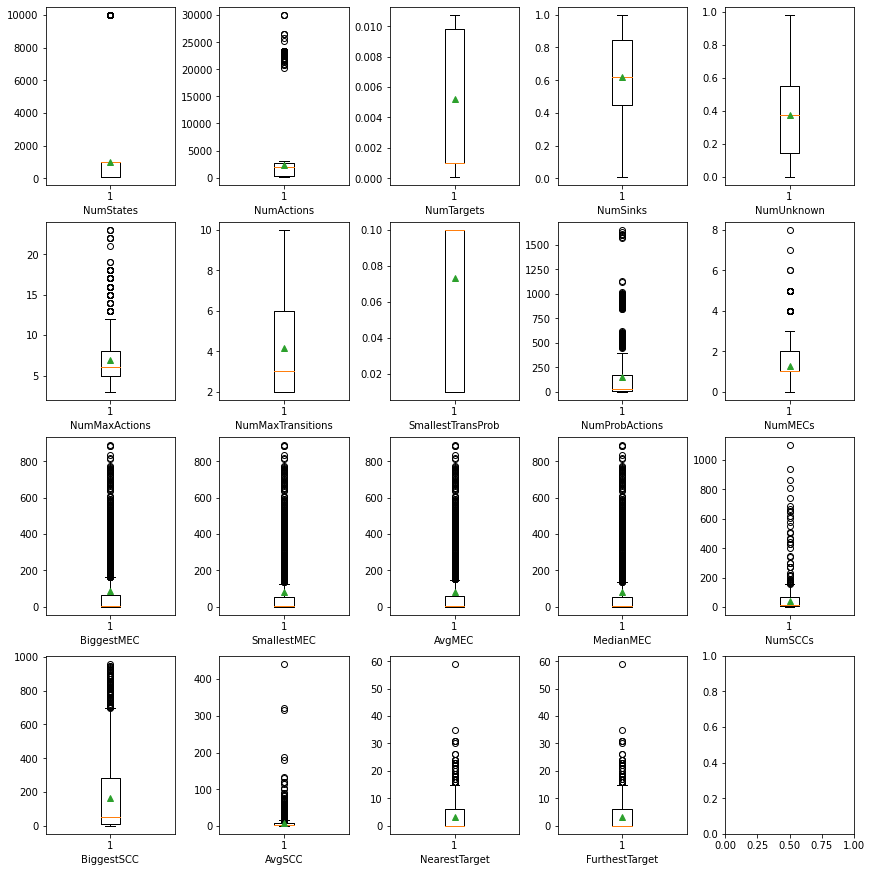

In [29]:
#Make Boxplots

entries_per_column = 5
entries_per_row = int(math.ceil(len(property_keys)/5))
fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(12,12), constrained_layout=True)
row = 0
column = 0
for property_key in property_keys:
        if (column == entries_per_column):
            row += 1
            column = 0
        axs[row, column].boxplot(data[property_key], showmeans=True)
        axs[row, column].set_xlabel(property_key)
        column+=1

In [30]:
#Print out specific stuff you are interested in
data_as_np = dict(data)
for key in data_as_np.keys():
    data_as_np[key] = np.asarray(data_as_np[key])
    
#for key in property_keys:    
for key in ["NumStates", "BiggestMEC", "NumMECs", "NumMaxActions", "NumProbActions", "NumUnknown"]:
    print("Key: ", key)
    print("\t Min: ",data_as_np[key].min())
    print("\t Max: ",data_as_np[key].max())
    print("\t Mean: ",data_as_np[key].mean())

Key:  NumStates
	 Min:  93.0
	 Max:  10002.0
	 Mean:  984.7322348094748
Key:  BiggestMEC
	 Min:  0.0
	 Max:  890.0
	 Mean:  88.43975283213182
Key:  NumMECs
	 Min:  0.0
	 Max:  8.0
	 Mean:  1.269824922760041
Key:  NumMaxActions
	 Min:  3.0
	 Max:  23.0
	 Mean:  6.866632337796086
Key:  NumProbActions
	 Min:  1.0
	 Max:  1652.0
	 Mean:  146.97167868177138
Key:  NumUnknown
	 Min:  0.0005998800239952009
	 Max:  0.9803921568627451
	 Mean:  0.37278017644777456


## Look at some graph to gain understanding of dataset

In [31]:
x_axis = range(len(table_times))
y_axises = dict()

#Init y_axises
for key in config_keys:
    y_axises[key] = data[key]

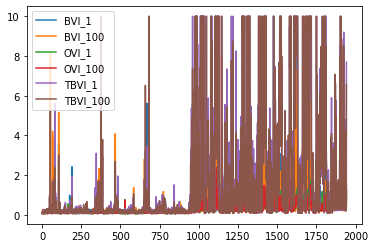

In [32]:
for config in y_axises.keys():
    plt.plot(x_axis, y_axises[config], label=config)
plt.legend()
plt.show()

### Interpret the graph

In [33]:
print(len(model_names))
print(len(data["NumStates"]))

1942
1942


In [41]:
#Get names of models above certain threshold

absolute_allowed_timedifference_in_seconds = 0.1
relative_allowed_timedifference = 0.01 # 0.1 -> 10% allowed difference
USE_RELATIVE_ERROR = True

confs_to_compare = config_keys
#confs_to_compare = ["OVI_1", "OVI_100"]

fastest_solver = dict()
for index in range(len(data["NumStates"])):
    model = model_names[index]
    fastest_solver[model] = [10000000, []]
    for key in confs_to_compare:
        soln_time = data[key][index]
        if (soln_time != PENTALY_FOR_NOT_FINISHING):
            if (fastest_solver[model][0] > soln_time):
                # Check which of the currently saved models are in the allowed precision
                new_soln_time = fastest_solver[model][0]
                fastest_solvers_for_model = [key]
                for old_key in fastest_solver[model][1]:
                    old_soln_time = data[old_key][index]
                    # Do comparison
                    include_old_key = False
                    if (USE_RELATIVE_ERROR):
                        include_old_key = (1.0 - relative_allowed_timedifference) * new_soln_time <= old_soln_time
                    else:
                        include_old_key = abs(new_soln_time - old_soln_time) <= absolute_allowed_timedifference_in_seconds
                    
                    if (include_old_key):
                        fastest_solvers_for_model.append(old_key)
                
                fastest_solver[model] = [soln_time, fastest_solvers_for_model]
                
            elif (fastest_solver[model][0] == soln_time):
                fastest_solver[model][1].append(key)

In [42]:
bestSolvers = dict()
for config_key in confs_to_compare:
    bestSolvers[config_key] = 0

for index in range(len(data["NumStates"])):
    model_name = model_names[index]
    for config_key in fastest_solver[model_name][1]:
        bestSolvers[config_key]+=1

for config_key in confs_to_compare:
    print("Config %s was the best solution method %d / %d times" % (config_key, bestSolvers[config_key], len(table_times)))

Config BVI_1 was the best solution method 1934 / 1942 times
Config BVI_100 was the best solution method 972 / 1942 times
Config OVI_1 was the best solution method 1210 / 1942 times
Config OVI_100 was the best solution method 687 / 1942 times
Config TBVI_1 was the best solution method 48 / 1942 times
Config TBVI_100 was the best solution method 47 / 1942 times


In [ ]:
#If you want to know which Models a Conf won, use this:
check_conf = "TBBVI_100"
explicit = True

for index in range(len(data["NumStates"])):
    model = model_names[index]
    if check_conf in fastest_solver[model][1]:
        print(model)
        if explicit:
            props = findModelWithNameInTable(table_properties, model)
            #print(props["NumSCCs"])
            for prop in props:
                print(prop," : ", props[prop])

# Do classic Data Mining stuff

## Heatmaps

In [ ]:
excluded_features = [
    #"NumTargets",
    #"SmallestTransProb"
]

correlation_dict = dict(data)

for feature in excluded_features:
    del correlation_dict[feature]

size = len(analysis_keys) - len(excluded_features) + len(config_keys)
print(size)

In [ ]:
#Linear Correlation
fig = plt.figure(figsize=(size,size))

df = pd.DataFrame(correlation_dict,columns=correlation_dict.keys())

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


## Scatter Plots

In [ ]:
#Scatterplot
def createScatterPlotForOneProperty(property_key):
    entries_per_column = int(math.sqrt(len(config_keys))+1)
    entries_per_row = entries_per_column
    fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(16,16), sharey=True)
    row = 0
    column = 0
    for key in config_keys:
        if (column == entries_per_column):
            row += 1
            column = 0
        axs[row, column].scatter(data[property_key], data[key])
        axs[row, column].set_xlabel(property_key),
        axs[row, column].set_ylabel(key)
        column+=1

def createScatterPlotForOneConfig(property_keys):
    entries_per_column = 1    
    entries_per_row = len(property_keys)
    fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(12,12), constrained_layout=True)
    row = 0
    column = 0
    for property_key in property_keys:
        for key in config_keys:
            if (column == entries_per_column):
                row += 1
                column = 0
            axs[row].scatter(data[property_key], data[key])
            axs[row].set_xlabel(property_key),
            axs[row].set_ylabel(key)
            column+=1

def createScatterPlotForMultipleProperties(property_keys):
    entries_per_column = len(config_keys)
    entries_per_row = len(property_keys)
    fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(12,20), constrained_layout=True)
    row = 0
    column = 0
    for property_key in property_keys:
        for key in config_keys:
            if (column == entries_per_column):
                row += 1
                column = 0
            if (USE_LABELS):
                axs[row, column].scatter(data[property_key], data[key], alpha=0.5, c=pandas_labels.map(coloring))
            else:
                axs[row, column].scatter(data[property_key], data[key], alpha=0.2)
            axs[row, column].set_xlabel(property_key),
            axs[row, column].set_ylabel(key)
            column+=1

def createHistPlotForMultipleProperties(property_keys):
    entries_per_column = len(config_keys)
    entries_per_row = len(property_keys)
    fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(12,12), constrained_layout=True)
    row = 0
    column = 0
    for property_key in property_keys:
        for key in config_keys:
            if (column == entries_per_column):
                row += 1
                column = 0
            sn.histplot(x = data[property_key], y =  data[config_key], cbar=True)
            axs[row, column].set_xlabel(property_key),
            axs[row, column].set_ylabel(key)
            column+=1

In [ ]:
if(USE_LABELS):
    print(coloring)

createScatterPlotForMultipleProperties(
    [
        #"NumStates",
        #"NumTargets",
        #"NumSinks",
        #"NumUnknown",
        "NumActions",
        "NumMaxActions",
        "NumMaxTransitions",
        "SmallestTransProb",
        "NumProbActions",
        "NumMECs",
        "BiggestMEC",
        #"SmallestMEC",
        #"AvgMEC",
        #"MedianMEC",
        "NumSCCs",
        "BiggestSCC",
        #"AvgSCC",
        "NearestTarget",
        #"FurthestTarget"
    ]
)

In [1113]:
#createHistPlotForMultipleProperties(["BiggestMEC", "NumUnknown", "NumMECs", "NumStates", "NumMaxActions", "NumProbActions"])

## Chi-square Tests: Are two features independent?

In [492]:
def bin_estimate(length):
    return int(1+math.log2(length))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


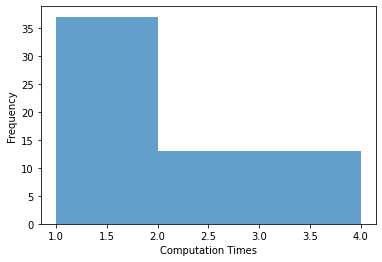

In [1061]:
#Histograms
#Each Bin should contain at least (recommended) 13 entries
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
prop = "NumUnknown"

x_set = [1]*37 + [2]*13 + [3]*13
y_set = [100]*37 + [300]*13 + [500]*13
print(x_set)
x_bins = (1, 2, 3, 4)#bin_estimate(len(data_set))
y_bins = (100, 300, 500, 700)

x_hist_gram = np.histogram(x_set, bins=x_bins)
y_hist_gram = np.histogram(y_set, bins=(100, 200, 300))
n, bins, patches = plt.hist(x=x_set, bins=x_bins, alpha = 0.7)
plt.xlabel('Computation Times')
plt.ylabel('Frequency')

plt.show()


[[37.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0. 13.]]


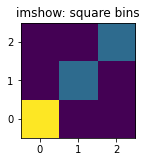

In [1062]:

H, xedges, yedges = np.histogram2d(x_set, y_set, bins=(x_bins, y_bins))
print(H)
# Histogram does not follow Cartesian convention (see Notes),

# therefore transpose H for visualization purposes.

H = H.T
fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(131, title='imshow: square bins')

plt.imshow(H, interpolation='nearest', origin='lower')

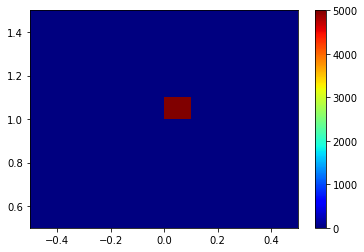

In [1063]:
# create data
x = [0]*5000#np.random.normal(size=5000)
y = [1]*5000#np.random.normal(size=5000)
 
# Big bins
H, x_edges, y_edges, img = plt.hist2d(x, y, bins=(10,10), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

# Small bins
#plt.hist2d(x, y, bins=(300, 300), cmap=plt.cm.jet)
#plt.show()
 
# If you do not set the same values for X and Y, the bins won't be a square!
#plt.hist2d(x, y, bins=(300, 30), cmap=plt.cm.jet)
#plt.show()

In [ ]:
#print(H)
ChiSq, p = stats.chisquare(np.ndarray.flatten(H))
print(ChiSq)
print(p)